In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
train_df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
test_df.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [5]:
print('Train Data shape: ', train_df.shape)
print('Test Data shape: ', test_df.shape)

Train Data shape:  (43152, 11)
Test Data shape:  (10788, 10)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
train_df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
train_df.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
train_df.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

## Id 

In [10]:
#We do not need the Id column as it will not give us any value, so I am going to drop it
train_df.drop('Id', axis=1, inplace=True)

In [11]:
train_df.duplicated().sum()

97

In [12]:
train_df.drop_duplicates(inplace=True)

In [13]:
train_df.shape

(43055, 10)

In [14]:
#Let's see the data after dropping the Id column
train_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


## carat

**Carat refers to the weight of the diamond, which is an important factor in determining its price.**

In [15]:
# Let's see the describtion 
carat_stats = train_df['carat'].describe()
print("Carat Statistics:")
print(carat_stats)

Carat Statistics:
count    43055.000000
mean         0.797752
std          0.473198
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64


In [16]:
carat_counts = train_df['carat'].value_counts().sum()
carat_counts

43055

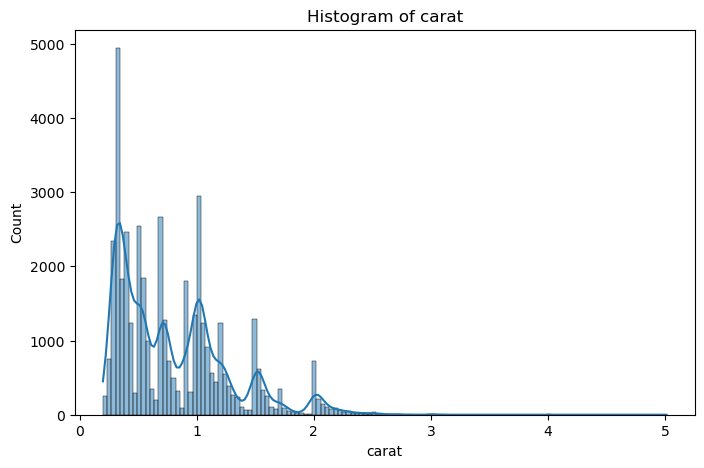

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='carat', kde=True)
plt.title(f"Histogram of {'carat'}")
plt.show()

## cut

**Cut refers to the quality of how the diamond is cut, affecting its brilliance and overall appearance.**

In [18]:
# Let's see the describtion 
cut_stats = train_df['cut'].describe()
print("Cut Statistics:")
print(cut_stats)

Cut Statistics:
count     43055
unique        5
top       Ideal
freq      17161
Name: cut, dtype: object


In [19]:

cut_counts = train_df['cut'].value_counts()
print("\nCut Counts:")
print(cut_counts)


Cut Counts:
cut
Ideal        17161
Premium      11080
Very Good     9651
Good          3874
Fair          1289
Name: count, dtype: int64


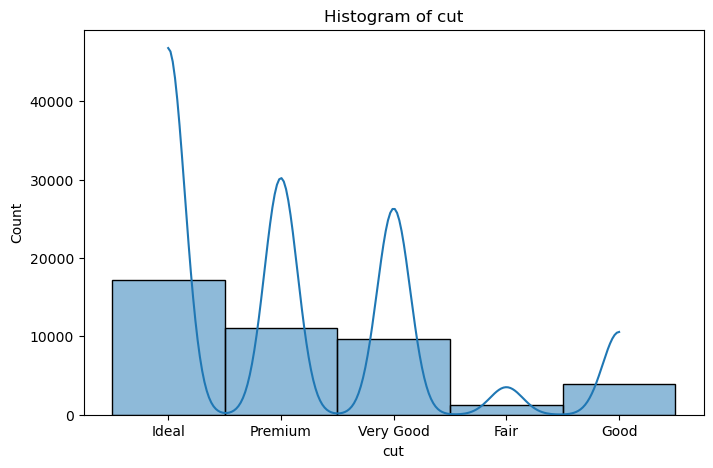

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='cut', kde=True)
plt.title(f"Histogram of {'cut'}")
plt.show()

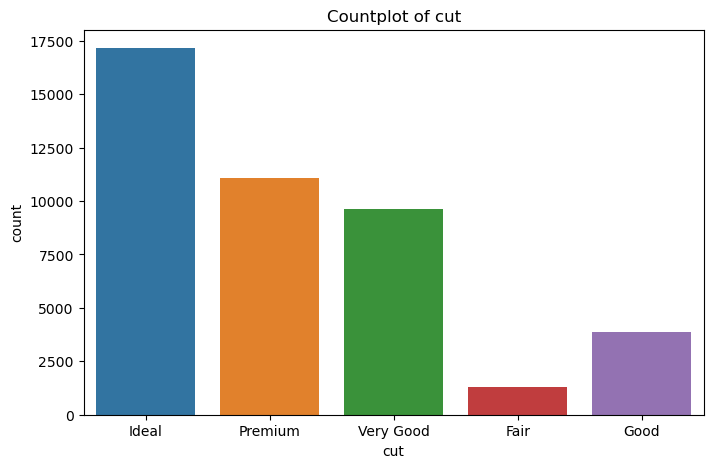

In [21]:

plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='cut')
plt.title(f"Countplot of {'cut'}")
plt.show()

## color

**Color represents the diamond's color grade, ranging from D (colorless) to Z (light yellow or brown).**

In [22]:
# Let's see the describtion 
color_stats = train_df['color'].describe()
print("Color Statistics:")
print(color_stats)

Color Statistics:
count     43055
unique        7
top           G
freq       9042
Name: color, dtype: object


In [23]:
color_counts = train_df['color'].value_counts()
print("\nColor Counts:")
print(color_counts)


Color Counts:
color
G    9042
E    7817
F    7616
H    6629
D    5411
I    4254
J    2286
Name: count, dtype: int64


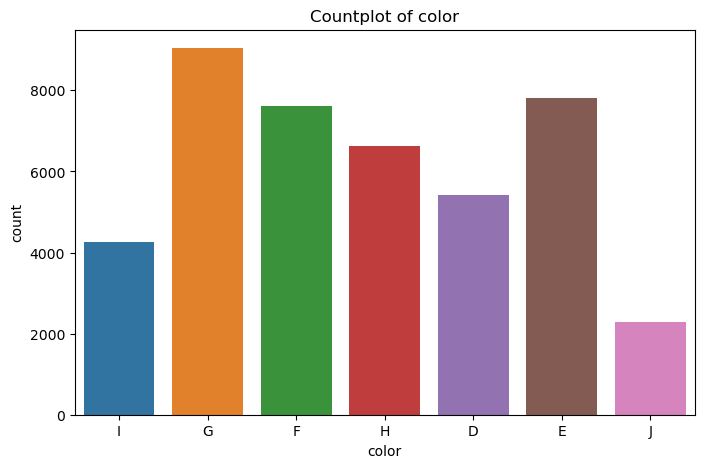

In [24]:

plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='color')
plt.title(f"Countplot of {'color'}")
plt.show()


## clarity

**Clarity refers to the presence of internal or external flaws in the diamond. It is usually graded on a scale from IF (internally flawless) to I3 (included).**

In [25]:
# Let's see the describtion 
clarity_stats = train_df['clarity'].describe()
print("Clarity Statistics:")
print(clarity_stats)

Clarity Statistics:
count     43055
unique        8
top         SI1
freq      10406
Name: clarity, dtype: object


In [26]:
clarity_counts = train_df['clarity'].value_counts()
print("\nClarity Counts:")
print(clarity_counts)


Clarity Counts:
clarity
SI1     10406
VS2      9806
SI2      7403
VS1      6465
VVS2     4031
VVS1     2899
IF       1440
I1        605
Name: count, dtype: int64


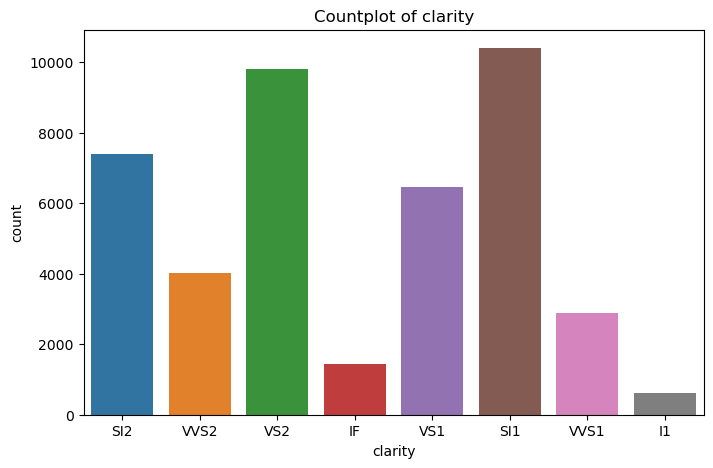

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='clarity')
plt.title(f"Countplot of {'clarity'}")
plt.show()

## depth

**Depth represents the height of a diamond as a percentage of its diameter.**

In [28]:
# Let's see the describtion 
depth_stats = train_df['depth'].describe()
print("depth Statistics:")
print(depth_stats)

depth Statistics:
count    43055.000000
mean        61.746373
std          1.435066
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64


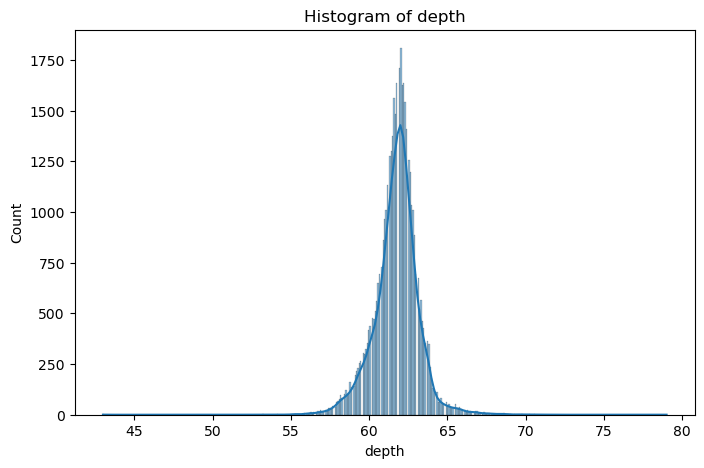

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='depth', kde=True)
plt.title(f"Histogram of {'depth'}")
plt.show()

## table

**Table refers to the width of the diamond's top facet as a percentage of its diameter.**

In [30]:
# Let's see the describtion 
table_stats = train_df['table'].describe()
print("Table Statistics:")
print(table_stats)

Table Statistics:
count    43055.000000
mean        57.459798
std          2.234325
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64


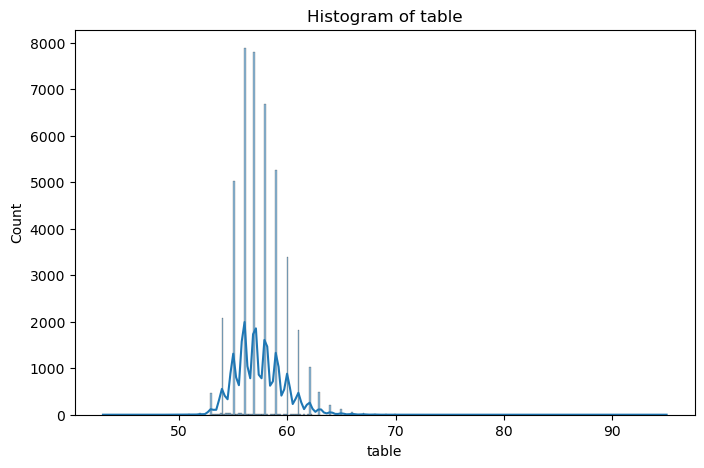

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='table', kde=True)
plt.title(f"Histogram of {'table'}")
plt.show()

## price

**This column contains the target variable, i.e., the price of the diamond.**

In [32]:
# Let's see the describtion 
price_stats = train_df['price'].describe()
print("Price Statistics:")
print(price_stats)

Price Statistics:
count    43055.000000
mean      3930.016235
std       3984.939986
min        326.000000
25%        948.000000
50%       2401.000000
75%       5312.500000
max      18823.000000
Name: price, dtype: float64


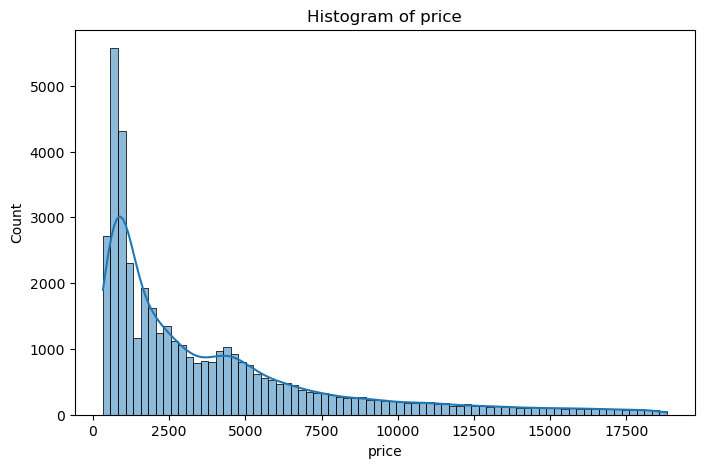

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='price', kde=True)
plt.title(f"Histogram of {'price'}")
plt.show()

## x

**This column represent the dimensions of the diamond in length.**

In [34]:
# Let's see the describtion 
x_stats = train_df['x'].describe()
print("X Statistics:")
print(x_stats)
#we can notice that the min is 0

X Statistics:
count    43055.000000
mean         5.731555
std          1.120732
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64


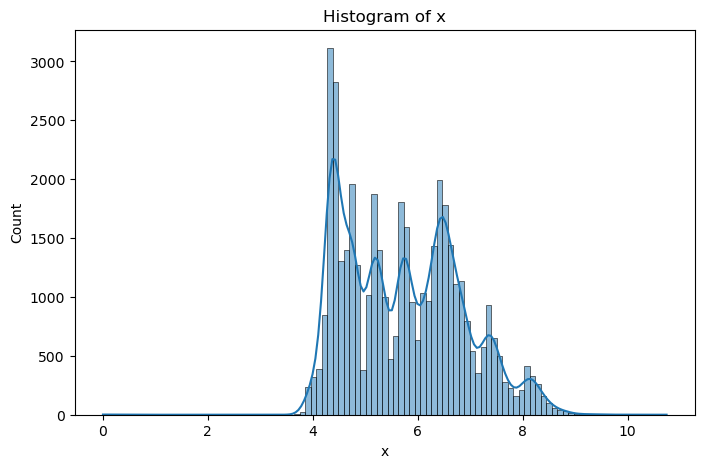

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='x', kde=True)
plt.title(f"Histogram of {'x'}")
plt.show()

## y

**This column represent the dimensions of the diamond in width.**

In [36]:
# Let's see the describtion 
y_stats = train_df['y'].describe()
print("Y Statistics:")
print(y_stats)
#we can notice that the min is 0

Y Statistics:
count    43055.000000
mean         5.735063
std          1.148389
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64


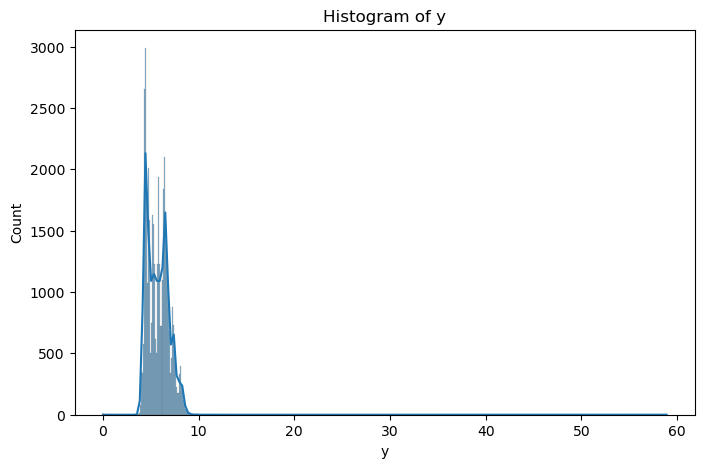

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='y', kde=True)
plt.title(f"Histogram of {'y'}")
plt.show()

## z

**This column represent the dimensions of the diamond in depth.** 

In [38]:
# Let's see the describtion 
z_stats = train_df['z'].describe()
print("z Statistics:")
print(z_stats)
#we can notice that the min is 0

z Statistics:
count    43055.000000
mean         3.538528
std          0.707922
min          0.000000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: z, dtype: float64


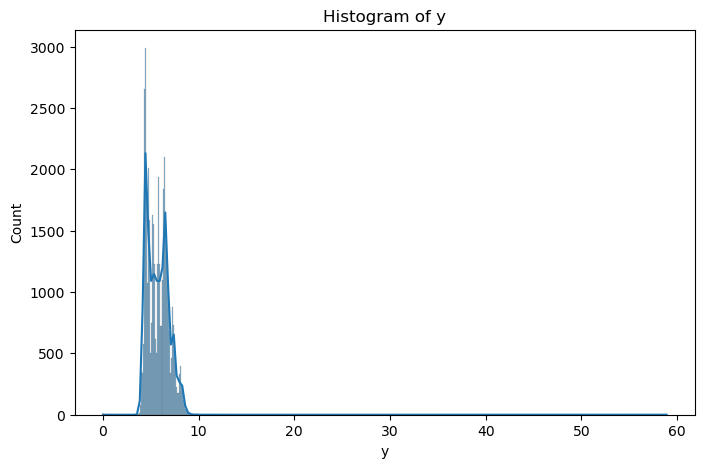

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='y', kde=True)
plt.title(f"Histogram of {'y'}")
plt.show()

### Dealing with the 0 values in x, y, z

In [40]:
train_df = train_df[(train_df['x'] != 0) & (train_df['y'] != 0) & (train_df['z'] != 0)]

In [41]:
train_df.describe()

,carat,depth,table,price,x,y,z
count,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000
mean,0.797475,61.746582,57.459375,3928.189112,5.731744,5.735116,3.539926
std,0.472928,1.434702,2.233822,3982.731057,1.118784,1.146848,0.704559
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5311.750000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Visualization

<Axes: >

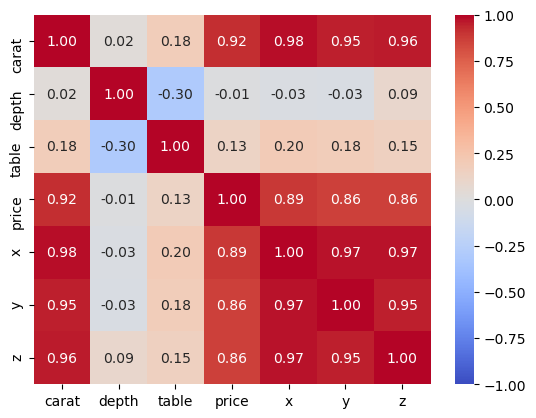

In [42]:
# plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".2f")

C:\Users\habob\anaconda3\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


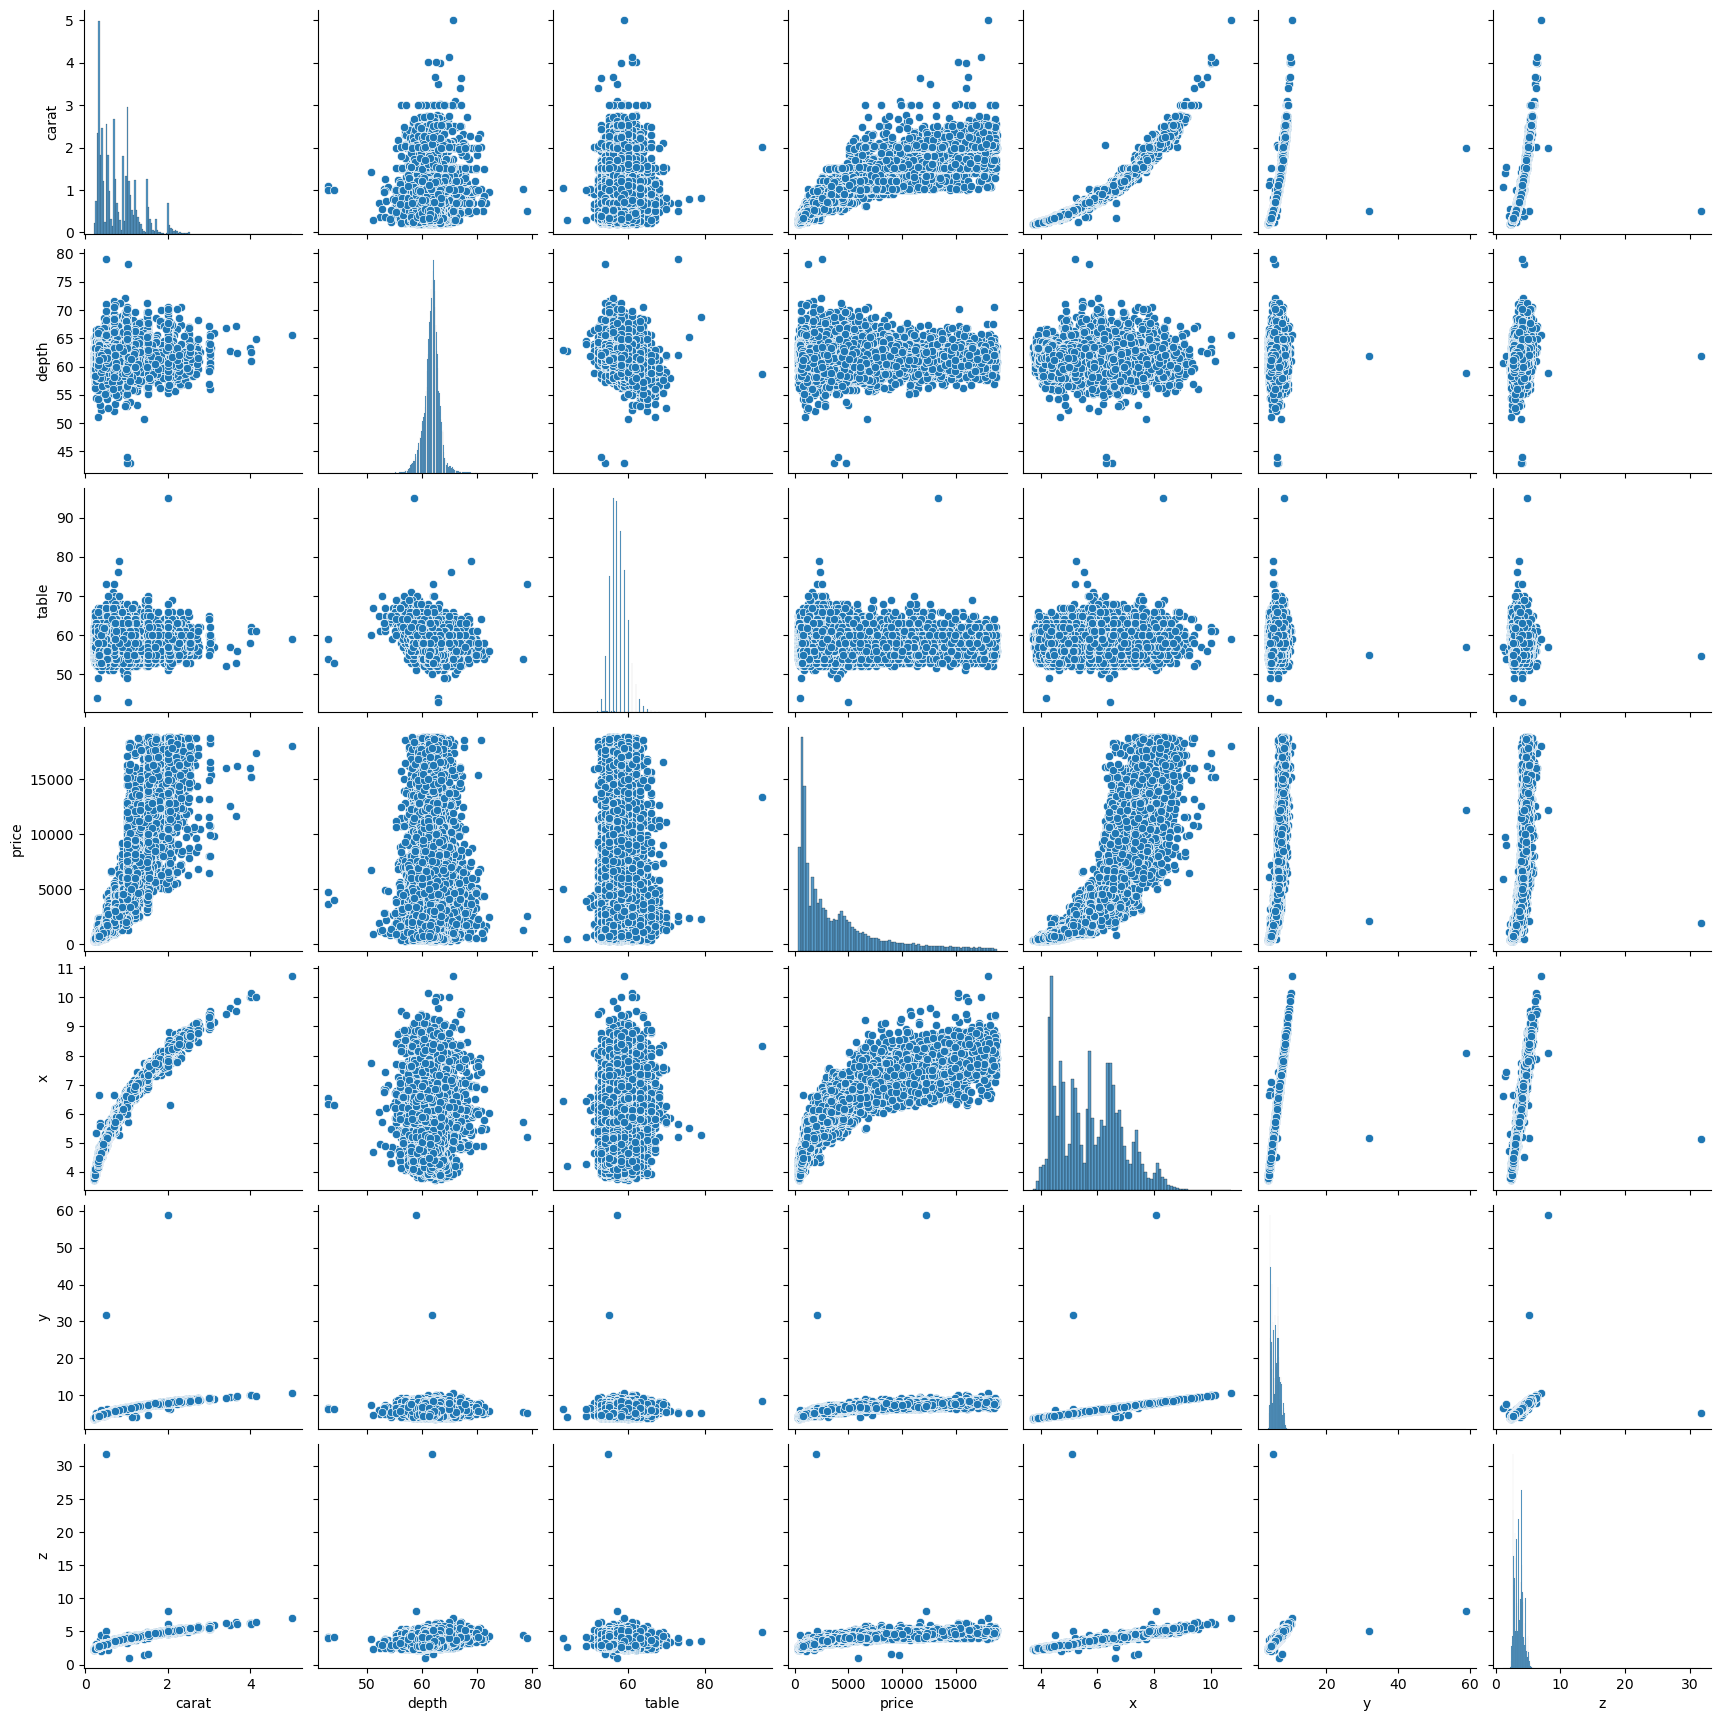

In [43]:
sns.pairplot(train_df)

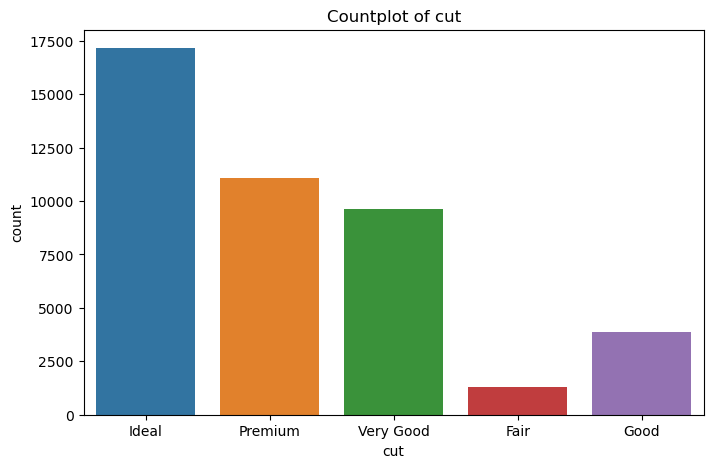

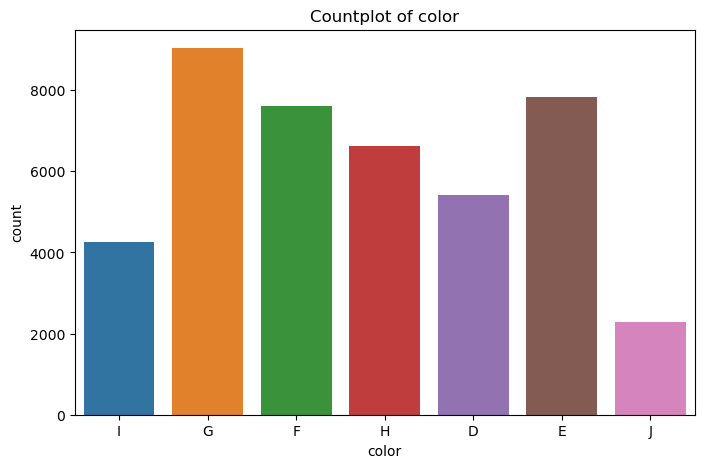

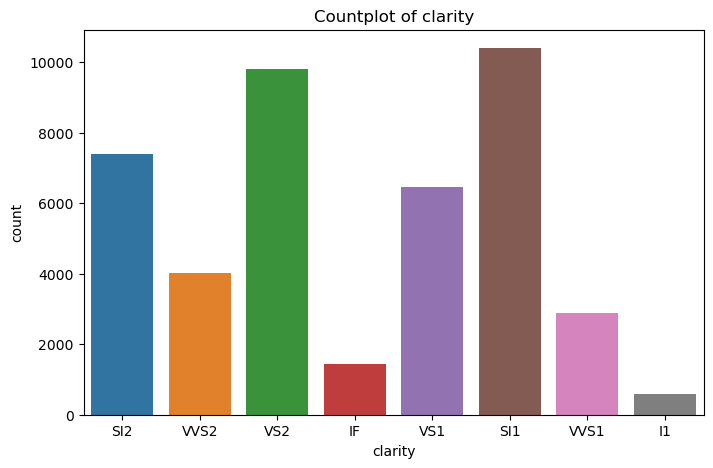

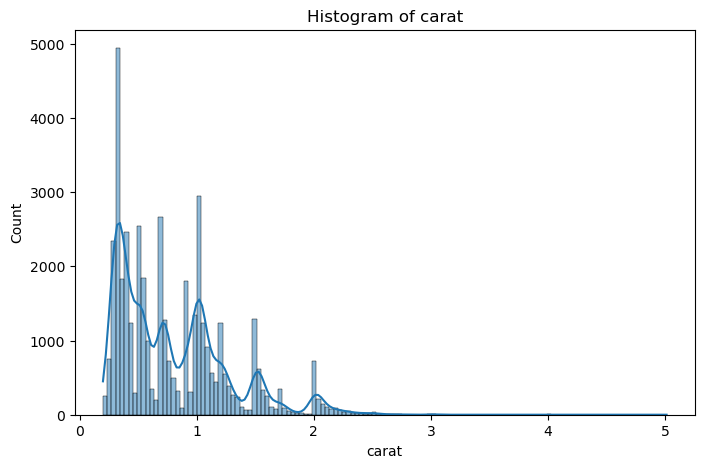

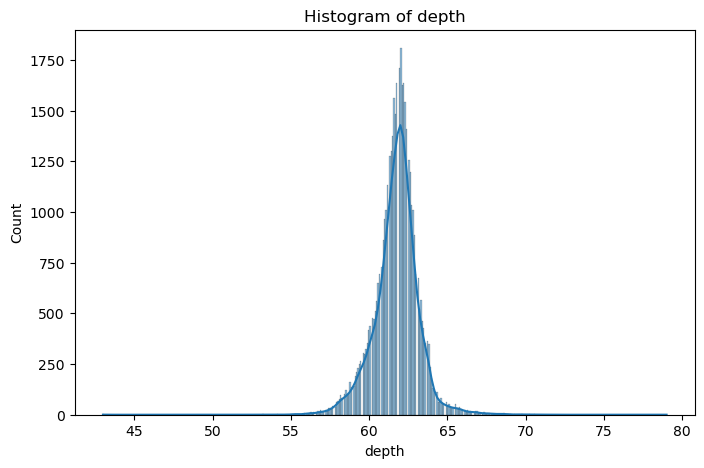

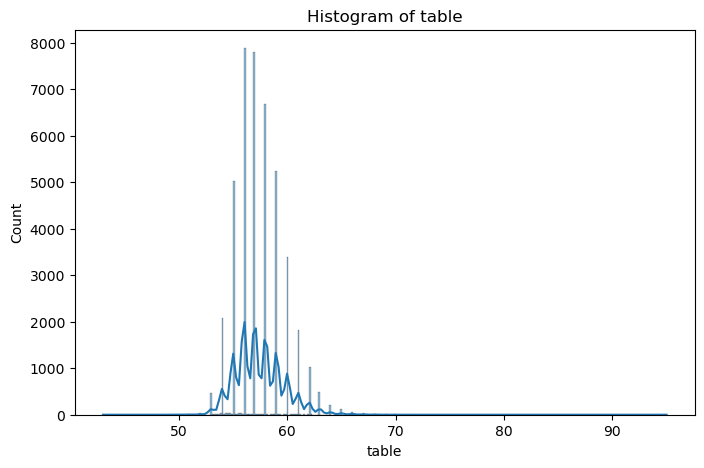

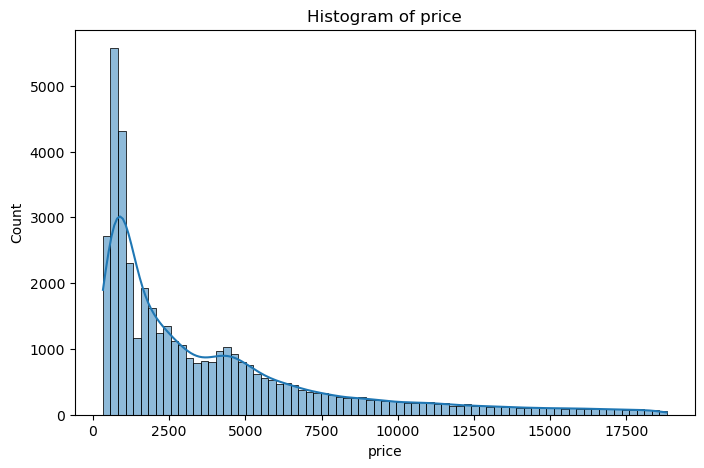

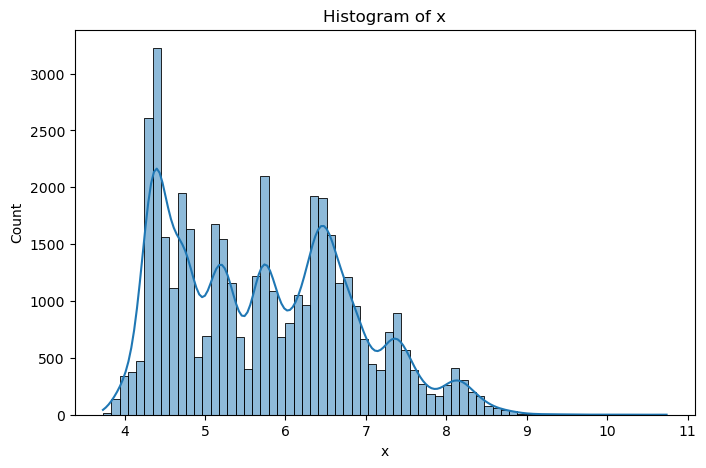

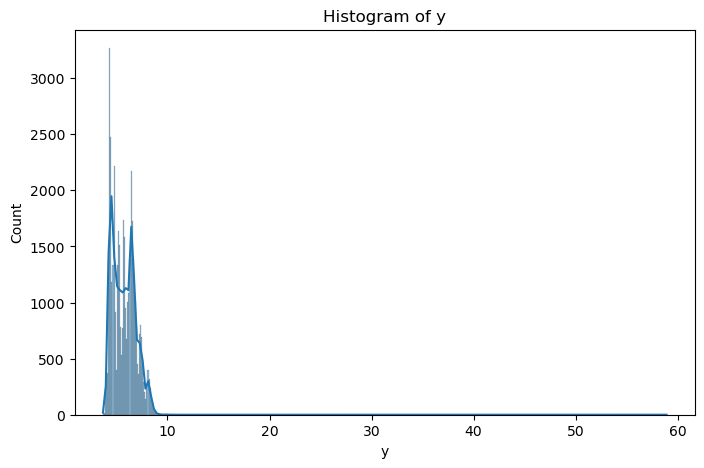

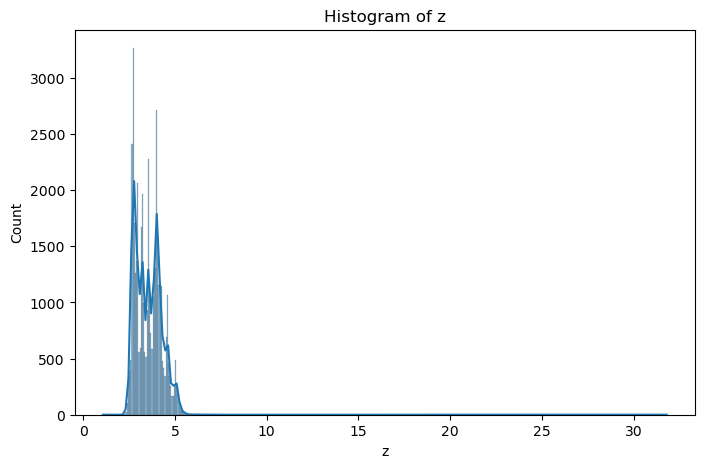

In [44]:
# Select columns for visualization
columns_to_visualize = ['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Plot categorical columns
for column in ['cut', 'color', 'clarity']:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_df, x=column)
    plt.title(f"Countplot of {column}")
    plt.show()

# Plot numerical columns
for column in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=train_df, x=column, kde=True)
    plt.title(f"Histogram of {column}")
    plt.show()

## Checking for outliers

Number of outliers in carat: 1487


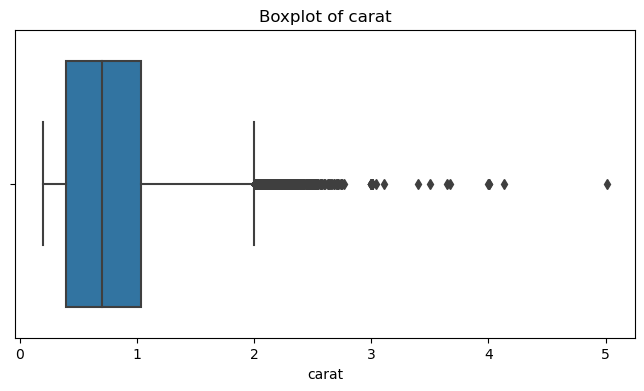

Number of outliers in depth: 2042


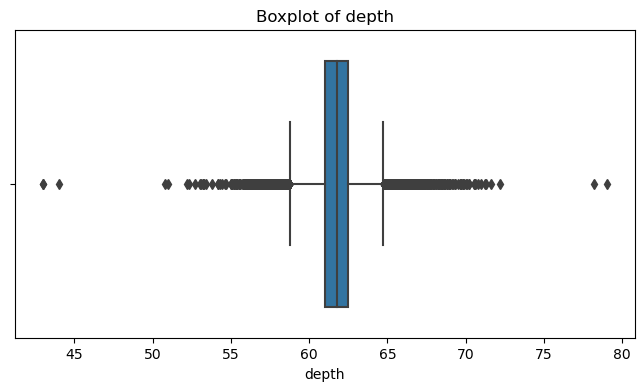

Number of outliers in table: 471


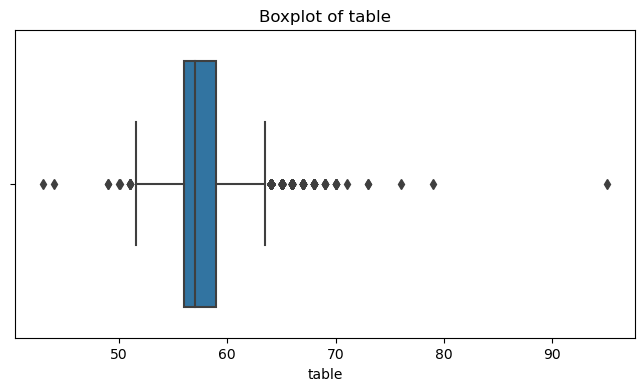

Number of outliers in price: 2830


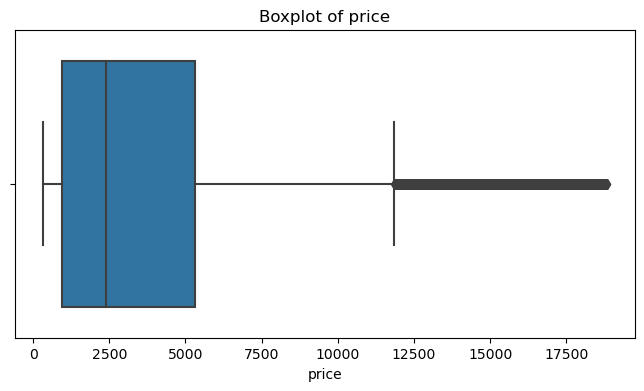

Number of outliers in x: 16


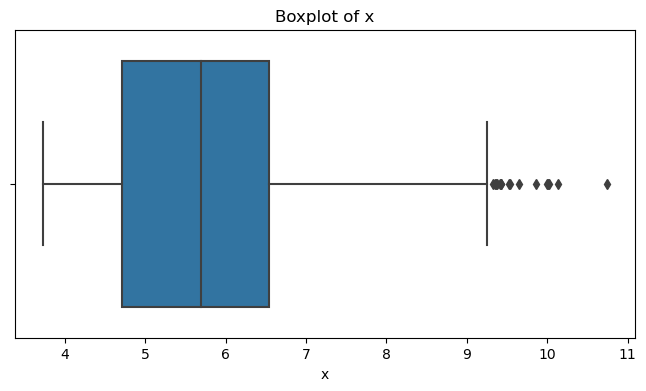

Number of outliers in y: 15


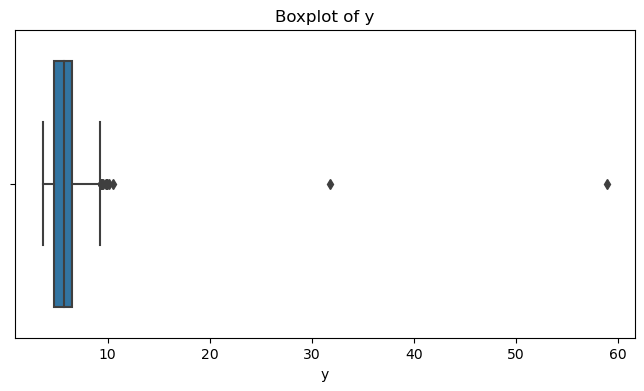

Number of outliers in z: 22


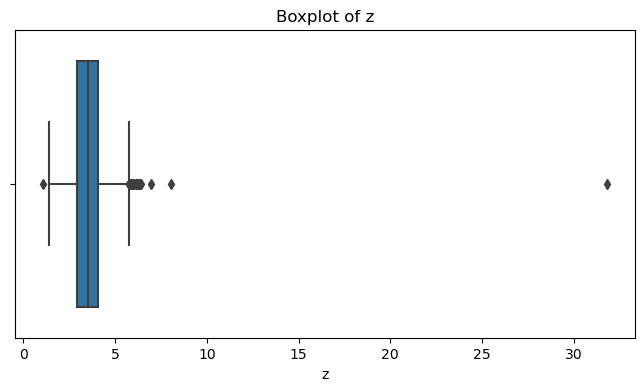

In [45]:
# Define a list of columns to check for outliers
columns_to_check = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Detect and visualize outliers for each column
for column in columns_to_check:
    # Calculate the interquartile range (IQR)
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier threshold
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = train_df[(train_df[column] < lower_threshold) | (train_df[column] > upper_threshold)]

    # Print the number of outliers
    print(f"Number of outliers in {column}: {len(outliers)}")

    # Create a boxplot to visualize the distribution and outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [46]:
# train_df=train_df[(train_df["depth"]<65)&(train_df["depth"]>50)]
# train_df=train_df[(train_df["table"]<65)&(train_df["table"]>50)]
# train_df=train_df[(train_df["carat"]<3)]
# # train_df=train_df[(train_df["price"])<17500]
# train_df=train_df[(train_df["x"]<10)]
# train_df=train_df[(train_df["y"])<10]
# train_df=train_df[(train_df["z"]<5)&(train_df["z"]>2)]
# train_df.shape

## Dealing with outliers

In [47]:
import pandas as pd


# Define a list of columns to check for outliers
columns_to_check = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Remove outliers for each column
for column in columns_to_check:
    # Calculate the interquartile range (IQR)
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier threshold
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Remove outliers
    train_df = train_df[(train_df[column] >= lower_threshold) & (train_df[column] <= upper_threshold)]

# Verify the updated DataFrame
print(train_df.head())

   carat        cut color clarity  depth  table  price     x     y     z
0   1.06      Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
2   0.32      Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3   0.53      Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4   0.70    Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50
5   0.90  Very Good     G      IF   63.1   58.0   5670  6.18  6.09  3.87


**Let's check the columns after deleting the outliers**

Number of outliers in carat: 19


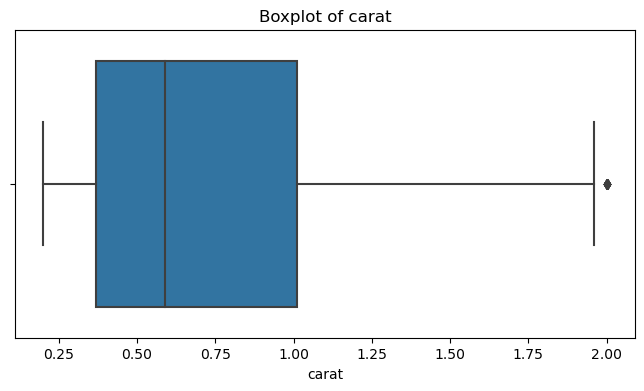

Number of outliers in depth: 305


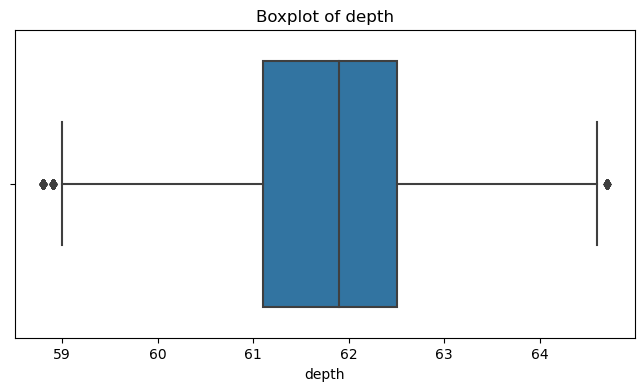

Number of outliers in table: 0


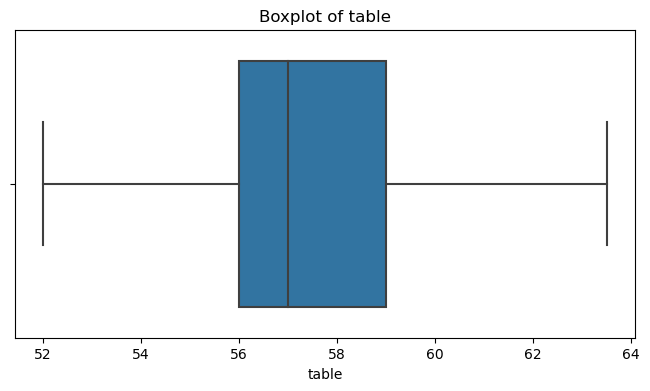

Number of outliers in price: 728


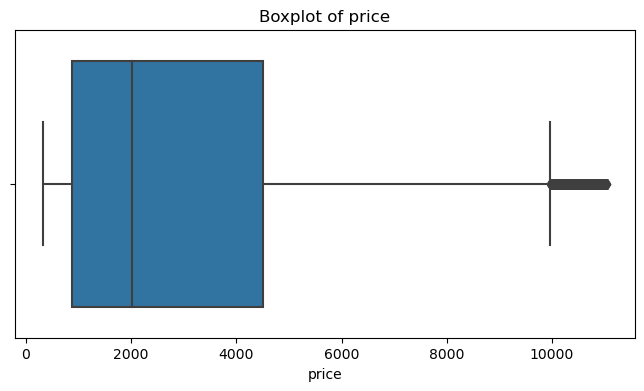

Number of outliers in x: 0


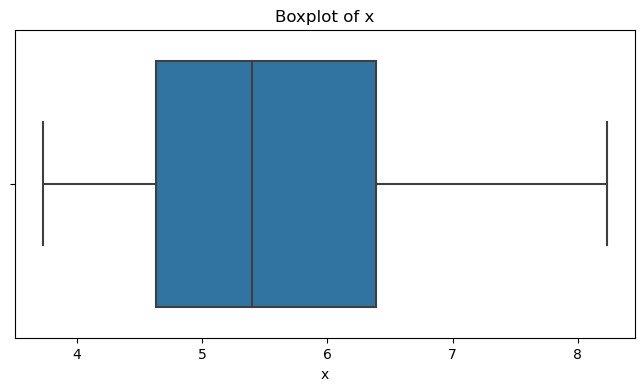

Number of outliers in y: 0


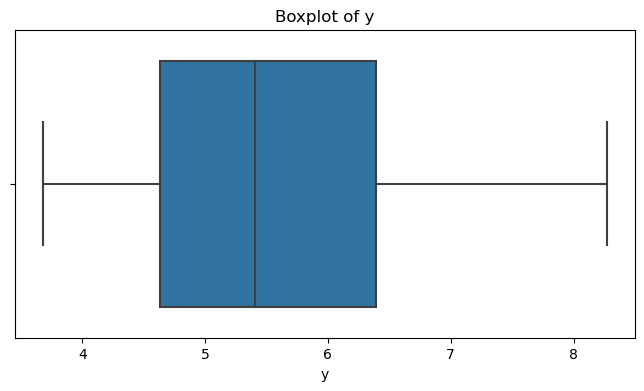

Number of outliers in z: 0


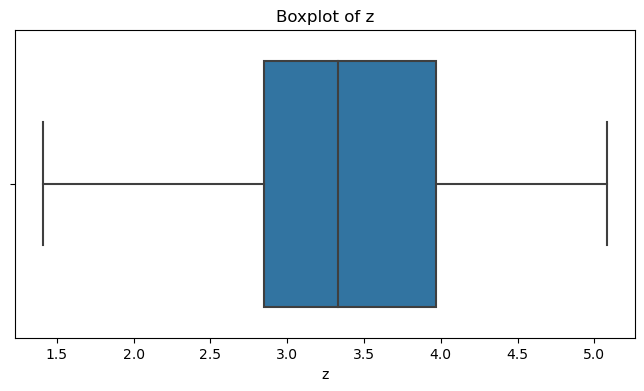

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define a list of columns to check for outliers
columns_to_check = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Detect and visualize outliers for each column
for column in columns_to_check:
    # Calculate the interquartile range (IQR)
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier threshold
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = train_df[(train_df[column] < lower_threshold) | (train_df[column] > upper_threshold)]

    # Print the number of outliers
    print(f"Number of outliers in {column}: {len(outliers)}")

    # Create a boxplot to visualize the distribution and outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [87]:
# # Creating new column
# train_df['carat'] = train_df['carat'].apply(lambda x: x * 0.0002)
# test_df['carat'] = test_df['carat'].apply(lambda x: x * 0.0002)

In [88]:
# train_df=train_df.rename(columns={"x": "Length", "y": "width","z":"depth","depth":"total depth percentage"})
# test_df=test_df.rename(columns={"x": "Length", "y": "width","z":"depth","depth":"total depth percentage"})
# train_df

In [89]:
test_df

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07


In [90]:
train_df['carat']

0        1.06
2        0.32
3        0.53
4        0.70
5        0.90
         ... 
43147    0.52
43148    0.72
43149    0.44
43150    0.31
43151    0.33
Name: carat, Length: 37345, dtype: float64

In [49]:
train_df['volume'] = train_df['x'] * train_df['y'] * train_df['z']
test_df['volume'] = test_df['x'] * test_df['y'] * test_df['z']
# train_df = train_df[train_df['volume']<1000]
train_df.drop(['x', 'y', 'z'], axis=1, inplace=True)
test_df.drop(['x', 'y', 'z'], axis=1, inplace=True)

**As we can notice from the box plots, the outliers are deleted.**

## Categorical columns

In [50]:
# Identify categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns

# Print the categorical columns
print("Categorical Columns:")
print(categorical_columns)
#As we can see we have three categorical columns

Categorical Columns:
Index(['cut', 'color', 'clarity'], dtype='object')


In [51]:
train_df['clarity'].unique()

array(['SI2', 'VS2', 'VVS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

## Dealing with Categorical columns

**Listed below are the diamond color grades (from 'D' to 'J') in descending order of importance, with 'D' being the most important and 'J' being the least important:**

-D: Colorless
-E: Colorless
-F: Colorless
-G: Near Colorless
-H: Near Colorless
-I: Near Colorless
-J: Near Colorless

In [52]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = ['color','cut', 'clarity']
color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
cut = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
clarity = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

# column_trans = make_column_transformer(
#     (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
#     remainder='passthrough',
#     verbose_feature_names_out=False,
# )

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer((OrdinalEncoder(categories= [color,cut,clarity]),cat),remainder='passthrough',verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [54]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[['D', 'E', 'F', 'G',
                                                             'H', 'I', 'J'],
                                                            ['Ideal', 'Premium',
                                                             'Very Good',
                                                             'Good', 'Fair'],
                                                            ['IF', 'VVS1',
                                                             'VVS2', 'VS1',
                                                             'VS2', 'SI1',
                                                             'SI2', 'I1']]),
                                 ['color', 'cut', 'clarity'])],
                  verbose_feature_names_out=False)

### Scaler

In [55]:
scaler = MinMaxScaler()

## Splitting the data to X and y

In [56]:
X = train_df.drop(columns=["price"])
y = train_df.price

In [57]:
#Let's see X
X.head()

,carat,cut,color,clarity,depth,table,volume
0,1.06,Ideal,I,SI2,61.8,57.0,176.483340
2,0.32,Ideal,F,VS2,61.3,56.0,52.943373
3,0.53,Ideal,G,VS2,61.2,56.0,86.422842
4,0.70,Premium,H,VVS2,61.0,57.0,115.315200
5,0.90,Very Good,G,IF,63.1,58.0,145.652094


In [58]:
#Let's see the shape of X
X.shape

(37440, 7)

In [59]:
#Let's see y
y.head()

0    4270
2     828
3    1577
4    2596
5    5670
Name: price, dtype: int64

In [60]:
#Let's see the shape of y
y.shape

(37440,)

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [62]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (29952, 7)
Train target shape   :  (29952,)
Test features shape  :  (7488, 7)
Test target shape    :  (7488,)


In [63]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

## LinearRegression Model

In [64]:
from sklearn.pipeline import Pipeline

operations = [
    ("ordinal", column_trans),
    ('scaler', scaler),
    ("linear",LinearRegression(fit_intercept=True, 
#     normalize=False,  
#     copy_X=True,  
    n_jobs=9))
]

pipe_linear_model = Pipeline(steps=operations)

pipe_linear_model.fit(X_train, y_train)

Pipeline(steps=[('ordinal',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['Ideal',
                                                                              'Premium',
                                                                              'Very '
                                                                              'Good',
                                                                              'Good',
                                                                              'Fair'],
                                                                             ['IF',
                                                                              'VVS1',
                                                                              'VVS2',
                                                                              'VS1',
                                                                              'VS2',
                                                                              'SI1',
                                                                              'SI2',
                                                                              'I1']]),
                                                  ['color', 'cut', 'clarity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('linear', LinearRegression(n_jobs=9))])

In [65]:
pred = pipe_linear_model.predict(X_test)

In [66]:
train_val(pipe_linear_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.913272,0.907862
mae,556.122668,569.408478
mse,582502.108215,626955.017412
rmse,763.218257,791.804911


### Cross validation

In [67]:
model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

pd.DataFrame(scores)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.913158
train_r2                                  0.913277
test_neg_mean_absolute_error           -556.269149
train_neg_mean_absolute_error          -556.118138
test_neg_mean_squared_error         -583164.576197
train_neg_mean_squared_error        -582468.074193
test_neg_root_mean_squared_error       -763.482228
train_neg_root_mean_squared_error      -763.193860
dtype: float64

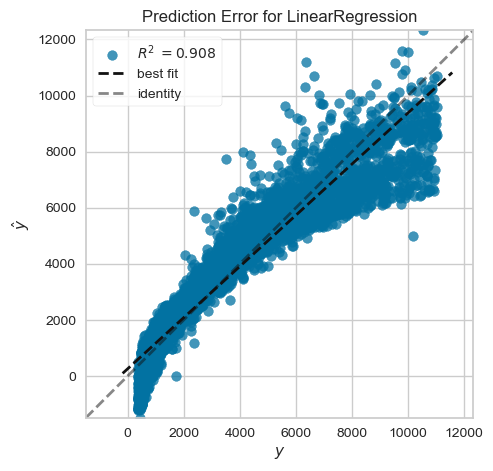

In [68]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
pipe_linear_model = Pipeline(steps=operations)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();

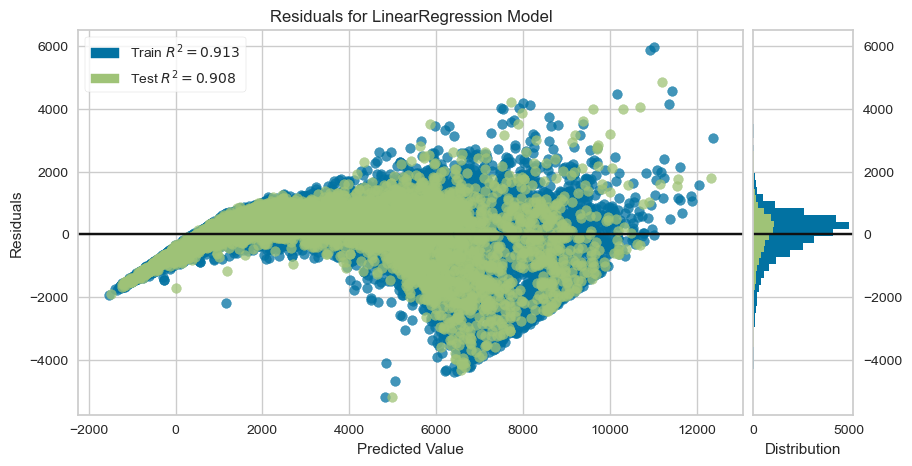

In [69]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = Pipeline(steps=operations)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();

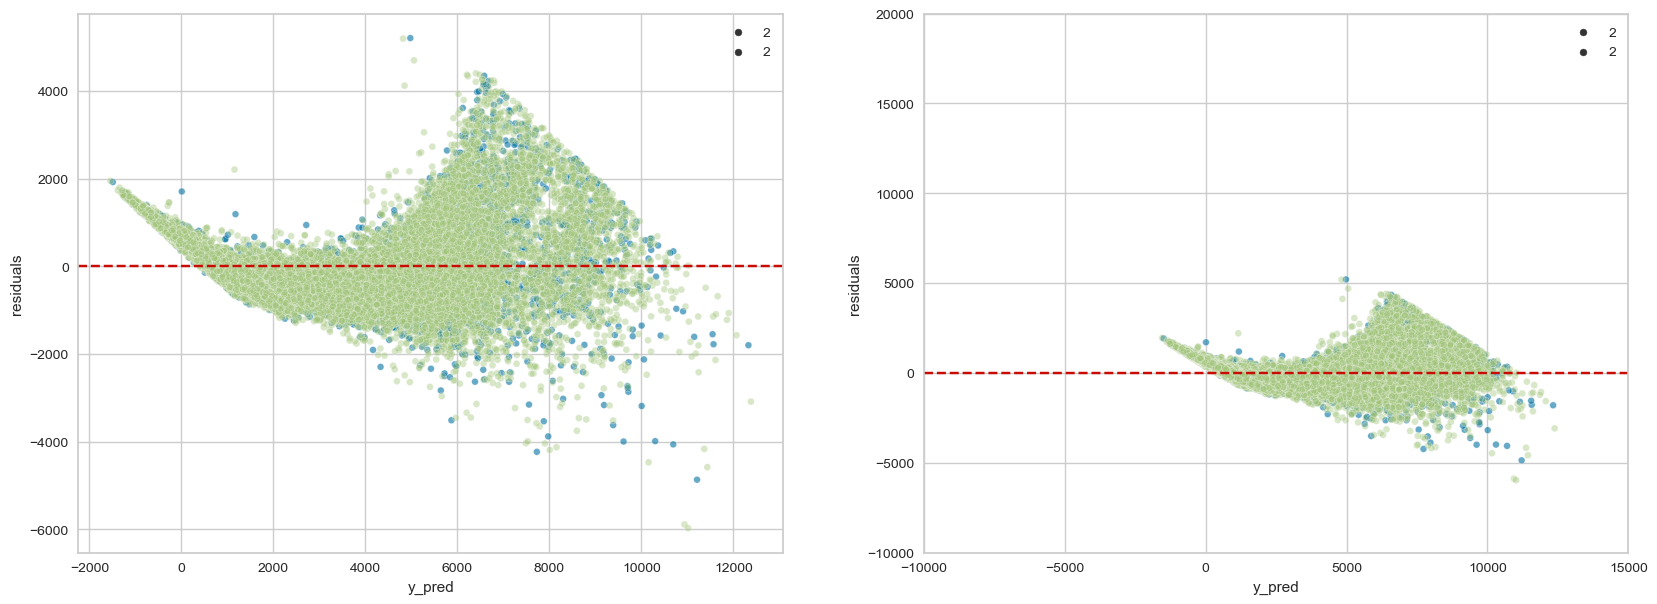

In [70]:
y_pred=pipe_linear_model.predict(X_test)
y_pred_train = pipe_linear_model.predict(X_train)

residual_test = y_test-y_pred
residual_train = y_train-y_pred_train

plt.figure(figsize=(20,7))
plt.subplot(121)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000,15000])
plt.ylim([-10000,20000])
plt.show();


## Random Forest Model

In [71]:
operations = [
    ("Ordinalencoder", column_trans),
    ('scaler', scaler),
    ("rf",RandomForestRegressor(random_state=101))
]

pipe_rf_model = Pipeline(steps=operations)

pipe_rf_model.fit(X_train, y_train)

Pipeline(steps=[('Ordinalencoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['Ideal',
                                                                              'Premium',
                                                                              'Very '
                                                                              'Good',
                                                                              'Good',
                                                                              'Fair'],
                                                                             ['IF',
                                                                              'VVS1',
                                                                              'VVS2',
                                                                              'VS1',
                                                                              'VS2',
                                                                              'SI1',
                                                                              'SI2',
                                                                              'I1']]),
                                                  ['color', 'cut', 'clarity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('rf', RandomForestRegressor(random_state=101))])

In [72]:
pred = pipe_rf_model.predict(X_test)

In [73]:
train_val(pipe_rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.997312,0.980951
mae,80.024630,205.921213
mse,18053.172467,129620.734873
rmse,134.362095,360.028797


In [75]:
fe = train_df.copy()
fe = fe.drop('price', axis=1)
fe.head()

,carat,cut,color,clarity,depth,table,volume
0,1.06,Ideal,I,SI2,61.8,57.0,176.483340
2,0.32,Ideal,F,VS2,61.3,56.0,52.943373
3,0.53,Ideal,G,VS2,61.2,56.0,86.422842
4,0.70,Premium,H,VVS2,61.0,57.0,115.315200
5,0.90,Very Good,G,IF,63.1,58.0,145.652094


In [76]:
features = fe.columns
features

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume'], dtype='object')

In [77]:
X_train_rf = column_trans.fit_transform(X_train)
X_train_rf

,color,cut,clarity,carat,depth,table,volume
33332,1.0,3.0,0.0,0.38,59.1,58.0,63.533538
25388,5.0,1.0,3.0,1.50,62.7,59.0,241.338000
40903,0.0,0.0,4.0,0.43,62.0,55.0,70.129800
40623,2.0,0.0,6.0,0.53,60.3,56.0,88.483500
717,1.0,1.0,6.0,0.73,61.8,58.0,116.429184
...,...,...,...,...,...,...,...
14209,1.0,0.0,2.0,0.32,62.3,56.0,52.492440
6558,0.0,2.0,5.0,0.90,63.3,57.0,143.392824
9196,3.0,1.0,3.0,0.31,62.4,58.0,50.504580
20434,2.0,0.0,0.0,0.31,62.0,56.0,50.666688


In [78]:
rf_model = RandomForestRegressor(max_depth=8, max_features=8, n_estimators=300, random_state=101).fit(X_train_rf, y_train)
rf_feature_imp = pd.DataFrame(data=rf_model.feature_importances_,
                              index = features,
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

,Feature Importance
volume,0.497509
clarity,0.399766
color,0.068643
carat,0.033409
cut,0.000356
depth,0.000197
table,0.000120


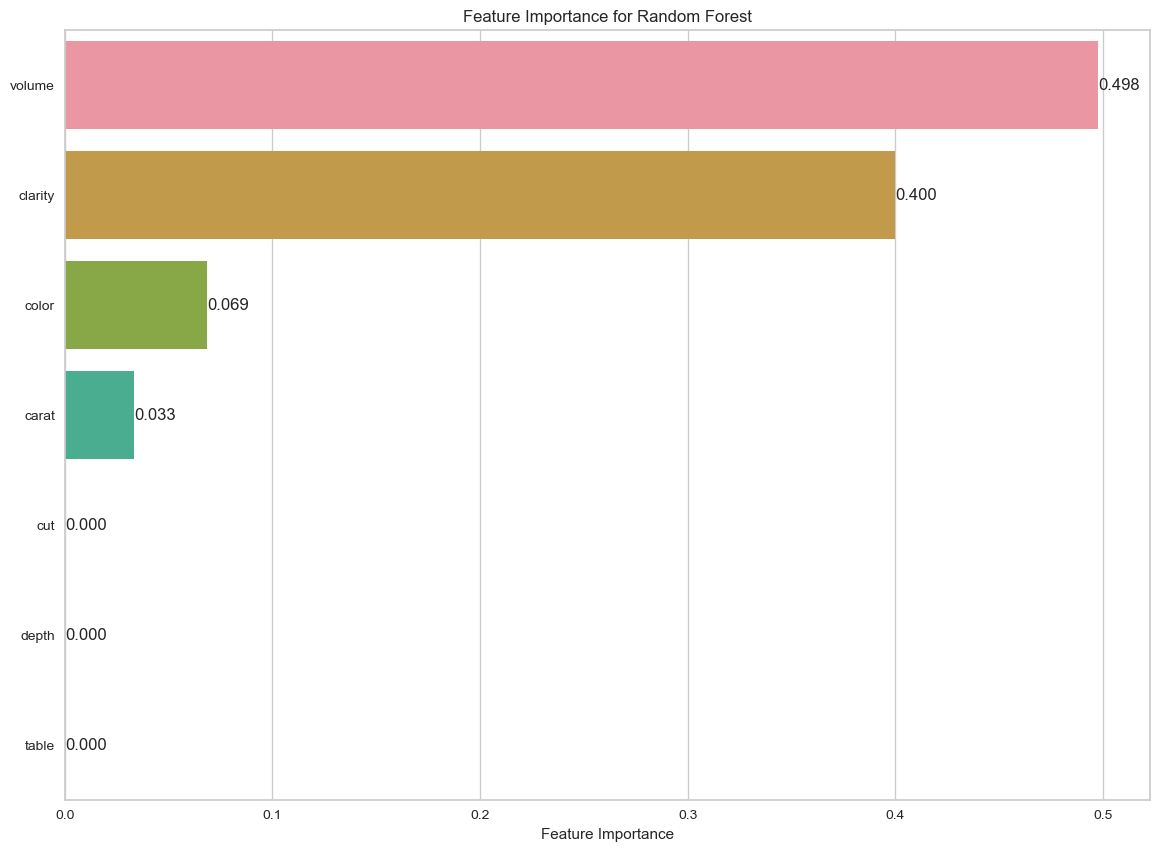

In [79]:
#Plotting the feature importance
plt.figure(figsize=(14, 10), dpi=100)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"],
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

In [121]:
'z', 'depth', 'table', 'cut'

('z', 'depth', 'table', 'cut')

In [122]:
operations = [
    ("Ordinalencoder", column_trans),
    ('scaler', scaler),
    ("rf",RandomForestRegressor(max_depth=9, n_estimators=400, max_features=9, random_state=101))
]
rf_model = Pipeline(steps=operations)
scores = cross_validate(rf_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

pd.DataFrame(scores)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.979190
train_r2                                  0.983351
test_neg_mean_absolute_error           -220.572939
train_neg_mean_absolute_error          -200.212210
test_neg_mean_squared_error         -137458.434125
train_neg_mean_squared_error        -110054.355933
test_neg_root_mean_squared_error       -370.559271
train_neg_root_mean_squared_error      -331.741039
dtype: float64

In [88]:
operations = [
    ("Ordinalencoder", column_trans),
#     ('scaler', scaler),
    ("rf",RandomForestRegressor(n_estimators=700, max_features=7, random_state=101))
]

pipe_rf_model2 = Pipeline(steps=operations)

pipe_rf_model2.fit(X_train, y_train)

pred2 = pipe_rf_model.predict(X_test)


train_val(pipe_rf_model2, X_train, y_train, X_test, y_test)

,train,test
R2,0.997720,0.981113
mae,86.424190,240.203091
mse,28904.107900,235549.099514
rmse,170.012082,485.334008


In [74]:
import numpy as np

# Access the RandomForestRegressor step of the pipeline
random_forest = pipe_rf_model2.named_steps['rf']

# Get feature importances
importances = random_forest.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Define feature names
feature_names = X_train.columns

# Print feature importance ranking
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")

clarity: 0.48400809941156486
y: 0.30831741670606194
x: 0.08248630040594393
color: 0.06580232797656381
carat: 0.03137398597921369
z: 0.020072278329180907
depth: 0.003599663261912513
table: 0.0023063313059752035
cut: 0.0020335966235831464


## RF GridSearch

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
operations = [
    ("Ordinalencoder", column_trans),
    ('scaler', scaler),
    ("rf",RandomForestRegressor(random_state=101))
]


pipeline = Pipeline(steps=operations)


# Define the parameter grid for grid search
param_grid = {
    "rf__n_estimators": [300,400, 500],
    "rf__max_depth": [4, 6,  8],
    'rf__max_features':[4, 6, 8],
}

# param_grid = {'rf__n_estimators':[100,200, 300, 400, 500, 600],
#              'rf__max_features':[2, 4, 6, 8],
#              'rf__max_depth':[2, 4,6, 8],
# #              'rf__min_samples_split':[2, 3, 4, 5],
# #              'rf__min_samples_leaf': [2, 3, 4, 5]
#              }

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)


In [ ]:
pred = grid_search.predict(X_test)

In [ ]:
train_val(grid_search, X_train, y_train, X_test, y_test)

In [ ]:
# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Evaluate the best model on the testing data
test_score = best_model.score(X_test, y_test)

# Print the best score and the test score
print("Best Score:", best_score)
print("Test Score:", test_score)

# Print the best parameters
print("Best Parameters:")
print(grid_search.best_params_)

## XG Boost Model 

In [ ]:
y_test

In [67]:
import xgboost as xgb


operations = [
    ("Ordinalencoder", column_trans),
    ('scaler', scaler),
    ("XGB_model", xgb.XGBRegressor(random_state=101))
]

pipe_xg_model = Pipeline(steps=operations)

pipe_xg_model.fit(X_train, y_train)


Pipeline(steps=[('Ordinalencoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['Ideal',
                                                                              'Premium',
                                                                              'Very '
                                                                              'Good',
                                                                              'Good',
                                                                              'Fair'],
                                                                             ['IF',
                                                                              'VVS1',
                                                                              'VVS2',
                                                                              'VS1',
                                                                              'VS2',
                                                                              'SI1',
                                                                              'SI2',
                                                                              'I1']]),
                                                  ['color', 'cut', 'clarity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=101, ...))])

In [68]:
pred = pipe_xg_model.predict(X_test)

In [69]:
train_val(pipe_xg_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.992072,0.981518
mae,186.567733,244.202529
mse,100523.824530,230492.247975
rmse,317.054924,480.096082


In [70]:
operations = [
    ("Ordinalencoder", column_trans),
    ('scaler', scaler),
    ("XGB_model", xgb.XGBRegressor(random_state=101))
]

xg_model = Pipeline(steps=operations)
scores = cross_validate(xg_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

pd.DataFrame(scores)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.983004
train_r2                                  0.992498
test_neg_mean_absolute_error           -242.206574
train_neg_mean_absolute_error          -181.983239
test_neg_mean_squared_error         -215330.954346
train_neg_mean_squared_error         -95128.819541
test_neg_root_mean_squared_error       -463.813654
train_neg_root_mean_squared_error      -308.414231
dtype: float64

In [71]:
operations = [
    ("Ordinalencoder", column_trans),
#     ('scaler', scaler),
   ("XGB_model", xgb.XGBRegressor(n_estimators=100,subsample=0.9,max_depth=6,random_state=101))
]

pipe_xg_model2 = Pipeline(steps=operations)

pipe_xg_model2.fit(X_train, y_train)

pred2 = pipe_xg_model2.predict(X_test)


train_val(pipe_xg_model2, X_train, y_train, X_test, y_test)

,train,test
R2,0.992548,0.982163
mae,185.662332,245.747545
mse,94496.760946,222453.671105
rmse,307.403255,471.649946


In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
operations = [
    ("Ordinalencoder", column_trans),
#     ('scaler', scaler),
   ("XGB_model", xgb.XGBRegressor(random_state=101))
]



pipeline = Pipeline(steps=operations)


# Define the parameter grid for grid search
param_grid = {
    "rf__n_estimators": [300,400, 500, 600],
    "rf__max_depth": [4, 5, 6, 7, 8, 9],
}

# param_grid = {'rf__n_estimators':[100,200, 300, 400, 500, 600],
#              'rf__max_features':[2, 4, 6, 8],
#              'rf__max_depth':[2, 4,6, 8],
# #              'rf__min_samples_split':[2, 3, 4, 5],
# #              'rf__min_samples_leaf': [2, 3, 4, 5]
#              }

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)


In [ ]:
pred = grid_search.predict(X_test)

In [ ]:
train_val(grid_search, X_train, y_train, X_test, y_test)

In [ ]:
# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Evaluate the best model on the testing data
test_score = best_model.score(X_test, y_test)

# Print the best score and the test score
print("Best Score:", best_score)
print("Test Score:", test_score)

# Print the best parameters
print("Best Parameters:")
print(grid_search.best_params_)

## Feature Importance

In [129]:
df = train_df.drop(['z', 'depth', 'table', 'cut'], axis=1)
df.head()

,carat,color,clarity,price,x,y
0,1.06,I,SI2,4270,6.57,6.60
2,0.32,F,VS2,828,4.43,4.41
3,0.53,G,VS2,1577,5.19,5.22
4,0.70,H,VVS2,2596,5.76,5.72
5,0.90,G,IF,5670,6.18,6.09


In [130]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat2 = ['color', 'clarity']
color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
# cut = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
clarity = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [131]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans2 = make_column_transformer((OrdinalEncoder(categories= [color,clarity]),cat2),remainder='passthrough',verbose_feature_names_out=False) # MinMaxScaler()

column_trans2=column_trans2.set_output(transform="pandas")

In [132]:
X2 = df.drop(columns=["price"])
y2 = df.price

In [133]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=101
)

In [134]:
operations = [
    ("Ordinalencoder", column_trans2),
    ('scaler', scaler),
    ("rf",RandomForestRegressor(n_estimators=300, max_features=8, max_depth=8, random_state=101))
]

pipe_rf_model = Pipeline(steps=operations)

pipe_rf_model.fit(X_train2, y_train2)

Pipeline(steps=[('Ordinalencoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['IF',
                                                                              'VVS1',
                                                                              'VVS2',
                                                                              'VS1',
                                                                              'VS2',
                                                                              'SI1',
                                                                              'SI2',
                                                                              'I1']]),
                                                  ['color', 'clarity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=8, max_features=8,
                                       n_estimators=300, random_state=101))])

In [135]:
pred = pipe_rf_model.predict(X_test2)

In [136]:
train_val(pipe_rf_model, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.978760,0.977430
mae,228.947333,239.026228
mse,140403.250000,148136.820478
rmse,374.704217,384.885464


In [137]:
test_df = test_df.drop(['z', 'depth', 'table', 'cut'], axis=1)
test_df.head()

,Id,carat,color,clarity,x,y
0,1,0.34,G,VVS2,4.52,4.48
1,2,0.71,E,VS2,5.74,5.68
2,3,0.44,I,VS1,4.83,4.88
3,4,0.81,E,SI2,6.09,6.03
4,5,0.40,G,VVS1,4.74,4.80


In [139]:

from sklearn.model_selection import train_test_split, GridSearchCV
operations = [
    ("Ordinalencoder", column_trans2),
#     ('scaler', scaler),
    ("rf",RandomForestRegressor(random_state=101))
]


pipeline = Pipeline(steps=operations)


# Define the parameter grid for grid search
param_grid = {
    "rf__n_estimators": [300,400, 500],
    "rf__max_depth": [4, 6,  8],
    'rf__max_features':[4, 6, 8],
}

# param_grid = {'rf__n_estimators':[100,200, 300, 400, 500, 600],
#              'rf__max_features':[2, 4, 6, 8],
#              'rf__max_depth':[2, 4,6, 8],
# #              'rf__min_samples_split':[2, 3, 4, 5],
# #              'rf__min_samples_leaf': [2, 3, 4, 5]
#              }

# Create GridSearchCV object
grid_search2 = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the grid search on the training data
grid_search2.fit(X_train2, y_train2)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Ordinalencoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['D',
                                                                                                     'E',
                                                                                                     'F',
                                                                                                     'G',
                                                                                                     'H',
                                                                                                     'I',
                                                                                                     'J'],
                                                                                                    ['IF',
                                                                                                     'VVS1',
                                                                                                     'VVS2',
                                                                                                     'VS1',
                                                                                                     'VS2',
                                                                                                     'SI1',
                                                                                                     'SI2',
                                                                                                     'I1']]),
                                                                         ['color',
                                                                          'clarity'])],
                                                          verbose_feature_names_out=False)),
                                       ('rf',
                                        RandomForestRegressor(random_state=101))]),
             param_grid={'rf__max_depth': [4, 6, 8],
                         'rf__max_features': [4, 6, 8],
                         'rf__n_estimators': [300, 400, 500]},
             scoring='neg_root_mean_squared_error')

In [140]:
pred = grid_search2.predict(X_test2)

In [141]:
train_val(grid_search2, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.978877,0.977706
mae,228.023018,237.486814
mse,139629.806437,146325.142367
rmse,373.670719,382.524695


In [142]:
# Get the best model and its score
best_model = grid_search2.best_estimator_
best_score = grid_search2.best_score_

# Evaluate the best model on the testing data
test_score = best_model.score(X_test2, y_test2)

# Print the best score and the test score
print("Best Score:", best_score)
print("Test Score:", test_score)

# Print the best parameters
print("Best Parameters:")
print(grid_search2.best_params_)

Best Score: -394.65007548918027
Test Score: 0.9777061413316264
Best Parameters:
{'rf__max_depth': 8, 'rf__max_features': 4, 'rf__n_estimators': 500}


In [124]:
import xgboost as xgb


operations = [
    ("Ordinalencoder", column_trans2),
    ('scaler', scaler),
    ("XGB_model", xgb.XGBRegressor(random_state=101))
]

pipe_xg_model = Pipeline(steps=operations)

pipe_xg_model.fit(X_train2, y_train2)

train_val(pipe_xg_model, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.990497,0.980519
mae,199.643415,251.873700
mse,120497.569037,242950.308704
rmse,347.127598,492.899897


## Final Model

### RF

In [148]:
operations = [
    ("Ordinalencoder", column_trans2),
#     ('scaler', scaler),
    ("rf",RandomForestRegressor(n_estimators=500, max_features=4, max_depth=8, random_state=101))
]

pipe_rf_model = Pipeline(steps=operations)

pipe_rf_model.fit(X2, y2)

Pipeline(steps=[('Ordinalencoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['IF',
                                                                              'VVS1',
                                                                              'VVS2',
                                                                              'VS1',
                                                                              'VS2',
                                                                              'SI1',
                                                                              'SI2',
                                                                              'I1']]),
                                                  ['color', 'clarity'])],
                                   verbose_feature_names_out=False)),
                ('rf',
                 RandomForestRegressor(max_depth=8, max_features=4,
                                       n_estimators=500, random_state=101))])

In [145]:
# train_val(pipe_rf_model, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.978591,0.979609
mae,229.257640,228.214298
mse,141518.531051,133838.694827
rmse,376.189488,365.839712


In [144]:
operations = [
    ("Ordinalencoder", column_trans2),
    ('scaler', scaler),
    ("XGB_model", xgb.XGBRegressor(random_state=101))
]

pipe_xg_model = Pipeline(steps=operations)

# pipe_xg_model.fit(X2, y2)
pipe_xg_model.fit(X_train2, y_train2)
train_val(pipe_rf_model, X_train2, y_train2, X_test2, y_test2)

NameError: name 'xgb' is not defined

In [ ]:
operations = [
    ("Ordinalencoder", column_trans2),
    ('scaler', scaler),
    ("XGB_model", xgb.XGBRegressor(random_state=101))
]

pipe_xg_model2 = Pipeline(steps=operations)

pipe_xg_model2.fit(X2, y2)

# train_val(pipe_rf_model2, X_train2, y_train2, X_test2, y_test2)

In [146]:
ID= test_df['Id']
ID

0            1
1            2
2            3
3            4
4            5
         ...  
10783    10784
10784    10785
10785    10786
10786    10787
10787    10788
Name: Id, Length: 10788, dtype: int64

In [147]:
price=pipe_rf_model.predict(test_df.drop('Id',axis=1))
data={'ID':ID,'price':price}
sub=pd.DataFrame(data)
sub.to_csv('sub_final_rf.csv',index=False)